In [803]:
from sklearn import tree
import pandas as pd


In [804]:
# Read from training data
train_data = pd.read_csv('training.csv', header=None)
train_2_data = pd.read_csv('training-2.csv', header=None)

train_data = pd.concat([train_data, train_2_data], ignore_index=True)

train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1.325693,0.049004,0.088625,0.158742,0.105489,0,1,0,612.0,792.0,h2
1,1,1.996008,0.384807,0.043850,0.556361,0.069240,0,1,0,612.0,792.0,h1
2,1,1.325693,0.049004,0.838232,0.138000,0.855095,0,1,0,612.0,792.0,h2
3,33,1.108893,0.049004,0.858148,0.450995,0.913914,0,0,0,612.0,792.0,t
4,5,1.325693,0.107828,0.684187,0.385679,0.701051,0,1,0,612.0,792.0,h2


In [805]:
len(train_data)

44

In [806]:
# Split into training and validation data
validation_data = train_data.sample(frac=0.2)
train_data = train_data.drop(validation_data.index)

train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1.325693,0.049004,0.088625,0.158742,0.105489,0,1,0,612.0,792.0,h2
1,1,1.996008,0.384807,0.043850,0.556361,0.069240,0,1,0,612.0,792.0,h1
2,1,1.325693,0.049004,0.838232,0.138000,0.855095,0,1,0,612.0,792.0,h2
3,33,1.108893,0.049004,0.858148,0.450995,0.913914,0,0,0,612.0,792.0,t
5,2,1.325693,0.049004,0.088625,0.260663,0.105489,0,1,0,612.0,792.0,h2


In [807]:
validation_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
25,1,1.330661,0.440018,0.953428,0.501060,0.970355,0,1,0,612.0,792.0,t
17,12,1.108893,0.107203,0.615413,0.505498,0.643405,0,0,0,612.0,792.0,t
37,3,1.117967,0.149182,0.429828,0.299535,0.443593,2431494,1,0,612.0,792.0,h2
18,1,1.108893,0.107204,0.650774,0.139529,0.664880,0,1,0,612.0,792.0,t
24,27,1.108893,0.490319,0.632807,0.892184,0.688573,0,0,0,612.0,792.0,t


In [808]:
# Split into training features and targets
train_features = train_data.iloc[:, :-1]
train_targets = train_data.iloc[:, -1]

validation_features = validation_data.iloc[:, :-1]
validation_targets = validation_data.iloc[:, -1]


In [809]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.325693,0.049004,0.088625,0.158742,0.105489,0,1,0,612.0,792.0
1,1,1.996008,0.384807,0.043850,0.556361,0.069240,0,1,0,612.0,792.0
2,1,1.325693,0.049004,0.838232,0.138000,0.855095,0,1,0,612.0,792.0
3,33,1.108893,0.049004,0.858148,0.450995,0.913914,0,0,0,612.0,792.0
5,2,1.325693,0.049004,0.088625,0.260663,0.105489,0,1,0,612.0,792.0


In [810]:
validation_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
25,1,1.330661,0.440018,0.953428,0.501060,0.970355,0,1,0,612.0,792.0,t
17,12,1.108893,0.107203,0.615413,0.505498,0.643405,0,0,0,612.0,792.0,t
37,3,1.117967,0.149182,0.429828,0.299535,0.443593,2431494,1,0,612.0,792.0,h2
18,1,1.108893,0.107204,0.650774,0.139529,0.664880,0,1,0,612.0,792.0,t
24,27,1.108893,0.490319,0.632807,0.892184,0.688573,0,0,0,612.0,792.0,t


In [811]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_targets)

In [812]:
for i in range(0, len(validation_features)):
    test_feature = list(validation_features.iloc[i])
    test_target = validation_targets.iloc[i]
    print(clf.predict([test_feature]), test_target)

['h1'] t
['t'] t
['h2'] h2
['t'] t
['t'] t
['t'] t
['h2'] h2
['h2'] h2
['h2'] h2


[Text(0.45454545454545453, 0.9, 'x[1] <= 1.113\ngini = 0.699\nsamples = 35\nvalue = [6, 14, 4, 11]'),
 Text(0.2727272727272727, 0.7, 'x[0] <= 6.5\ngini = 0.408\nsamples = 14\nvalue = [0, 0, 4, 10]'),
 Text(0.18181818181818182, 0.5, 'x[4] <= 0.202\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 4, 1]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]'),
 Text(0.36363636363636365, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9]'),
 Text(0.6363636363636364, 0.7, 'x[2] <= 0.153\ngini = 0.472\nsamples = 21\nvalue = [6, 14, 0, 1]'),
 Text(0.5454545454545454, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0]'),
 Text(0.7272727272727273, 0.5, 'x[2] <= 0.492\ngini = 0.406\nsamples = 8\nvalue = [6, 1, 0, 1]'),
 Text(0.6363636363636364, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0, 0]'),
 Text(0.8181818181818182, 0.3, 'x[0] <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1]'),
 

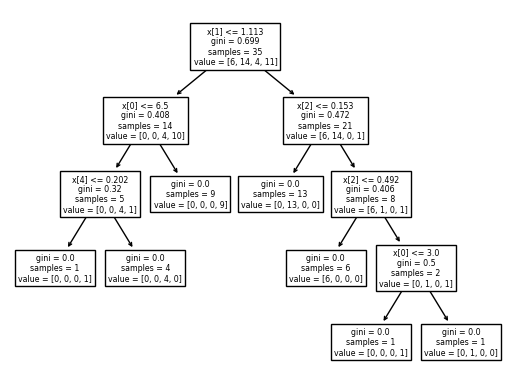

In [813]:
tree.plot_tree(clf)